機械学習（ニューラルネットワーク）によりアヤメの花の分類を行うプログラム

このプログラムでは，特徴量（がく片の長さと幅，花びらの長さと幅）で3クラス（セトサ，ヴァーシカラー，ヴァージニカ）へ分類を行います

In [ ]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Now Learning
Iteration 1, loss = 0.97339514
Iteration 2, loss = 0.97132499
Iteration 3, loss = 0.96926868
Iteration 4, loss = 0.96725347
Iteration 5, loss = 0.96525972
Iteration 6, loss = 0.96330418
Iteration 7, loss = 0.96137268
Iteration 8, loss = 0.95945080
Iteration 9, loss = 0.95754453
Iteration 10, loss = 0.95567969
Iteration 11, loss = 0.95382755
Iteration 12, loss = 0.95198824
Iteration 13, loss = 0.95017980
Iteration 14, loss = 0.94840037
Iteration 15, loss = 0.94663985
Iteration 16, loss = 0.94491305
Iteration 17, loss = 0.94321245
Iteration 18, loss = 0.94153728
Iteration 19, loss = 0.93990084
Iteration 20, loss = 0.93833485
Iteration 21, loss = 0.93680804
Iteration 22, loss = 0.93530370
Iteration 23, loss = 0.93384028
Iteration 24, loss = 0.93240826
Iteration 25, loss = 0.93100936
Iteration 26, loss = 0.92963072
Iteration 27, loss = 0.92828007
Iteration 28, loss = 0.92696191
Iteration 29, loss = 0.92567849
Iteration 30, loss = 0.92442148
Iteration 31, loss = 0.92318242
Iter

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


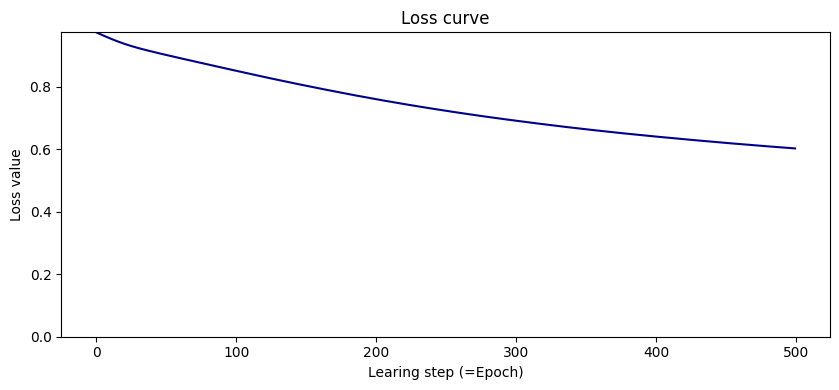

In [ ]:
#　アヤメの分類 4特徴量(2petal+2sepal)で3クラスへ分類

# 学習回数
epochs = 100
# データ分割（学習用，テスト用）
data_split = True


# アヤメのデータを読み込み、変数irisに格納
iris = datasets.load_iris()
# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target


# data split (train, test)
if data_split == True:
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
else:
	X_train = X
	y_train = y



# 分類器：多層ニューラルネットワーク
# hidden_layer_sizes : 中間層数、各中間層ニューロン数
# max_iter : 学習回数上限
# tol : 損失関数の値の変化が10回tol値以下で学習終了
# random_state : 重みの初期値 (1＝ランダム初期値固定、None = ランダム初期値変化）
clf = MLPClassifier(hidden_layer_sizes=(4, ), max_iter=epochs, tol=0, random_state=1, verbose=1)


# ニューラルネットワークの学習
print('Now Learning')
clf.fit(X_train, y_train)

# 分類精度を計算
# 学習データに対する分類結果を取得
result = clf.predict(X_train)

print('ターゲット（正解）')
print(y_train)
print('ニューラルネットワークの判定')
print(result)

# データ数をtotalに格納
# len : 配列の長さ取得（2次元配列に対しては行数取得）
total = len(X_train)
# ターゲット（正解）と予測が一致した数をcorrect_numに格納
correct_num = sum(result==y_train)

# 正解率をパーセント表示
print('')
print('Data num of train: {}'.format(total))
print('Accuracy [%] for train data: {:.2f}\n'.format(100.0*correct_num/total))

if data_split == True:
	result_test = clf.predict(X_test)
	total_test = len(X_test)
	correct_num = sum(result_test==y_test)
	print('Data num of test: {}'.format(total_test))
	print('Accuracy [%] for test data: {:.2f}'.format(100.0*correct_num/total_test))


# 結果を表示
# グラフウインドウ全体の大きさ(縦方向に1枚、横方向に2枚のグラフ表示領域を確保)
fig = plt.figure(figsize=(8.5,4.0))

# 1枚目のグラフを設定
# 損失関数の時間変化を描画
axs = fig.add_subplot(1,1,1)
axs.plot(clf.loss_curve_, color='darkblue')
# 損失関数のグラフのtitle, 軸ラベルを設定
axs.set_title('Loss curve')
axs.set_xlabel('Learing step (=Epoch)')
axs.set_ylabel('Loss value')
# グラフ縦軸の範囲　最小値0、最大値をloss_curve_の最大値とする
axs.set_ylim(0, max(clf.loss_curve_))

# グラフを表示
plt.tight_layout()
plt.show()